### Confusion Matrix

In [92]:
def plot_confusion_matrix(confusion_matrices, clf):
    columns = ('Wide Left', 'Shot Left', 'Shot Middle', 'Shot Right', 'Wide Right', 'Short')
    num = len(confusion_matrices)
    fars, nears = ['Far']*num, ['Near']*num
    distances = fars + nears
    distances[::2], distances[1::2] = fars, nears
    
    feature_sets = ['Position+Velocity']*2 + ['Position']*2 + ['Distance+Bearing']*2
    
    fig = plt.figure(figsize=(10,30))
    plt.clf()

    for subplot_num, confusion_matrix, distance, features in zip(range(1, num+1), confusion_matrices, distances, feature_sets):
        axes = fig.add_subplot(num, 2, subplot_num)
        df = pd.DataFrame(confusion_matrix, columns=columns, index=columns)
        axes.imshow(df, interpolation='nearest')
        plt.title('{} {} ({})'.format(clf, features, distance))
        tick_marks = np.arange(len(columns))
        plt.xticks(tick_marks, df.index, rotation=90)
        plt.yticks(tick_marks, df.index)
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

        width = height = len(columns)

        for x in xrange(width):
            for y in xrange(height):
                axes.annotate(str(confusion_matrix[x][y]) if confusion_matrix[x][y] else '', xy=(y, x), 
                            horizontalalignment='center',
                            verticalalignment='center')

    fig.subplots_adjust(wspace=.5, hspace=.65)

### Original Keeper Behavior

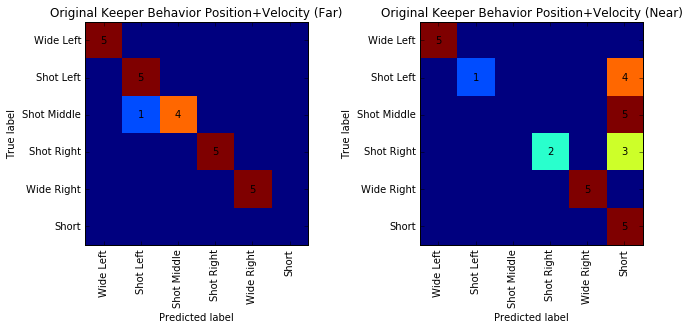

In [93]:
far = np.array([[5,0,0,0,0,0],
                [0,5,0,0,0,0],
                [0,1,4,0,0,0],
                [0,0,0,5,0,0],
                [0,0,0,0,5,0],
                [0,0,0,0,0,0]])

near = np.array([[5,0,0,0,0,0],
                 [0,1,0,0,0,4],
                 [0,0,0,0,0,5],
                 [0,0,0,2,0,3],
                 [0,0,0,0,5,0],
                 [0,0,0,0,0,5]])

plot_confusion_matrix([far, near], 'Original Keeper Behavior')

### Softmax

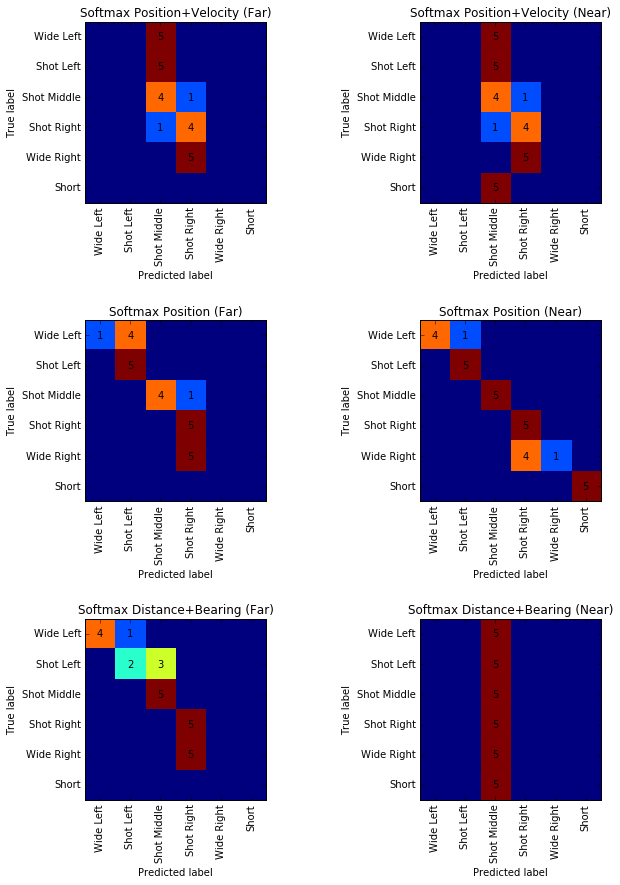

In [94]:
pv_far =  np.array([[0,0,5,0,0,0],
                    [0,0,5,0,0,0],
                    [0,0,4,1,0,0],
                    [0,0,1,4,0,0],
                    [0,0,0,5,0,0],
                    [0,0,0,0,0,0]])

pv_near = np.array([[0,0,5,0,0,0],
                    [0,0,5,0,0,0],
                    [0,0,4,1,0,0],
                    [0,0,1,4,0,0],
                    [0,0,0,5,0,0],
                    [0,0,5,0,0,0]])

p_far  =  np.array([[1,4,0,0,0,0],
                    [0,5,0,0,0,0],
                    [0,0,4,1,0,0],
                    [0,0,0,5,0,0],
                    [0,0,0,5,0,0],
                    [0,0,0,0,0,0]])

p_near =  np.array([[4,1,0,0,0,0],
                    [0,5,0,0,0,0],
                    [0,0,5,0,0,0],
                    [0,0,0,5,0,0],
                    [0,0,0,4,1,0],
                    [0,0,0,0,0,5]])

db_far =  np.array([[4,1,0,0,0,0],
                    [0,2,3,0,0,0],
                    [0,0,5,0,0,0],
                    [0,0,0,5,0,0],
                    [0,0,0,5,0,0],
                    [0,0,0,0,0,0]])

db_near = np.array([[0,0,5,0,0,0],
                    [0,0,5,0,0,0],
                    [0,0,5,0,0,0],
                    [0,0,5,0,0,0],
                    [0,0,5,0,0,0],
                    [0,0,5,0,0,0]])

plot_confusion_matrix([pv_far, pv_near, p_far, p_near, db_far, db_near], 'Softmax')

### Neural Network 

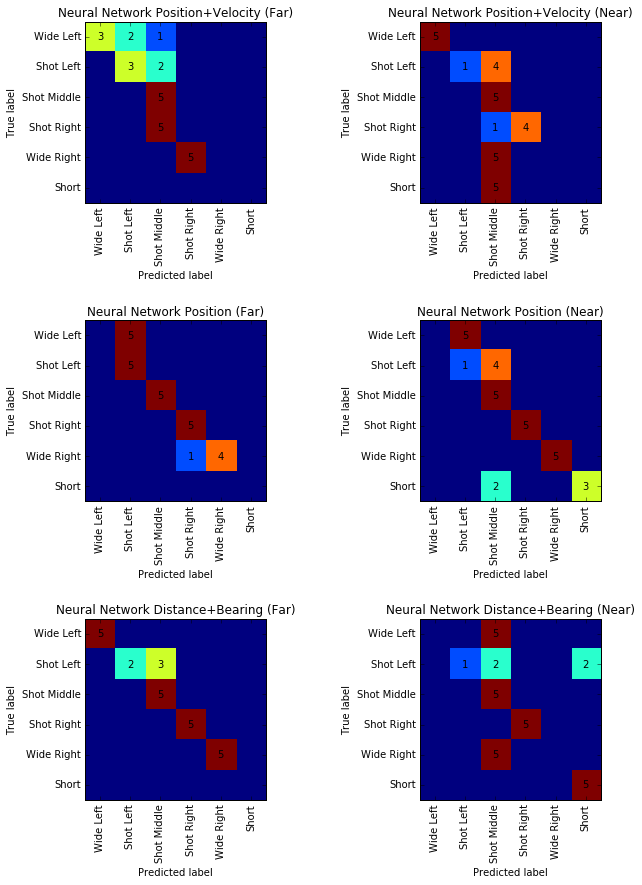

In [96]:
pv_far =  np.array([[3,2,1,0,0,0],
                    [0,3,2,0,0,0],
                    [0,0,5,0,0,0],
                    [0,0,5,0,0,0],
                    [0,0,0,5,0,0],
                    [0,0,0,0,0,0]])

pv_near = np.array([[5,0,0,0,0,0],
                    [0,1,4,0,0,0],
                    [0,0,5,0,0,0],
                    [0,0,1,4,0,0],
                    [0,0,5,0,0,0],
                    [0,0,5,0,0,0]])

p_far  =  np.array([[0,5,0,0,0,0],
                    [0,5,0,0,0,0],
                    [0,0,5,0,0,0],
                    [0,0,0,5,0,0],
                    [0,0,0,1,4,0],
                    [0,0,0,0,0,0]])

p_near =  np.array([[0,5,0,0,0,0],
                    [0,1,4,0,0,0],
                    [0,0,5,0,0,0],
                    [0,0,0,5,0,0],
                    [0,0,0,0,5,0],
                    [0,0,2,0,0,3]])

db_far =  np.array([[5,0,0,0,0,0],
                    [0,2,3,0,0,0],
                    [0,0,5,0,0,0],
                    [0,0,0,5,0,0],
                    [0,0,0,0,5,0],
                    [0,0,0,0,0,0]])

db_near = np.array([[0,0,5,0,0,0],
                    [0,1,2,0,0,2],
                    [0,0,5,0,0,0],
                    [0,0,0,5,0,0],
                    [0,0,5,0,0,0],
                    [0,0,0,0,0,5]])

plot_confusion_matrix([pv_far, pv_near, p_far, p_near, db_far, db_near], 'Neural Network')